In [1]:
import pandas as pd
import numpy as np

In [2]:
file_name = 'C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total.csv'  # 读入文件
data = pd.read_csv(file_name)
data.shape

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (49,50,65,73,74,84,85,86,87,88,89,97,98,103,106,107,108,109,110,195,196,201,208,209,210,211,212,213,214,215,216,219,220,221,222,223,224,225,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,271,272,273,274,275,276,277,278,279,280,281,282,283,307,308,309,322,323,324,325,326,327,329,330,331,332,333,334,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,471,472,473,474,475,476,477,478,479,480,481,482,483,523,524,525,541,542,543,544,550,552,554,557,558,564,568,582,583,585,586,587,588,592,593,594,601,602,615,619,626,635,671,672,673,678,682,683,684,689,696,706,708,712,713,714,715,716,717,718,723,725,726,730,732,734,735,736,737,738,740,756,757,758,761,766,782,784,785,786,806,807,819,821,823,

(4290, 3316)

In [3]:
data.tail(5)

,subject_id,subject_id.1,gender,dod,dob,expire_flag,hadm_id,marital_status,diagnosis,228307,...,51502,51112,51122,51225,50901,51406,51024,51380,51072,51073
4285,71274,71274,F,2191-01-31 00:00:00,2155-08-10 00:00:00,1,130914,SINGLE,ENDOCARDITIS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4286,51301,51301,F,NaN,2054-07-07 00:00:00,0,193117,DIVORCED,CORONARY ARTERY DISEASE; CHEST PAIN\LEFT HEART...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4287,28414,28414,F,2163-02-22 00:00:00,2077-02-21 00:00:00,1,184455,MARRIED,S/P MI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4288,86392,86392,F,2171-10-01 00:00:00,2104-11-07 00:00:00,1,193556,MARRIED,ACUTE MYOCARDIAL INFARCTION; CHF;SHORTNESS OF ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4289,95503,95503,F,NaN,2020-08-02 00:00:00,0,121779,WIDOWED,RESPIRATORY DISTRESS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isnull()

,subject_id,subject_id.1,gender,dod,dob,expire_flag,hadm_id,marital_status,diagnosis,228307,...,51502,51112,51122,51225,50901,51406,51024,51380,51072,51073
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
4286,False,False,False,True,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
4287,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
4288,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True


In [5]:
data.columns

Index(['subject_id', 'subject_id.1', 'gender', 'dod', 'dob', 'expire_flag',
       'hadm_id', 'marital_status', 'diagnosis', '228307',
       ...
       '51502', '51112', '51122', '51225', '50901', '51406', '51024', '51380',
       '51072', '51073'],
      dtype='object', length=3316)

In [6]:
nan_column = []  #找到null值不大于2000的值
for i in data.columns:
    res = data[i].isnull().sum()
    if res > 2000:
        nan_column.append(i)
print(len(nan_column))

3144


In [7]:
data_2000 = data.drop(labels = nan_column,axis = 1)
data_2000.shape

(4290, 172)

In [8]:
file_name_2000 = 'C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total_2000.csv'  #将res>2000的数据写入文件
data_2000.to_csv(file_name_2000)

In [9]:
data_2000.iloc[0, :]

subject_id                    28920
subject_id.1                  28920
gender                            F
dob             2035-07-09 00:00:00
expire_flag                       1
                       ...         
50808                           NaN
50812                           NaN
50813                           NaN
50809                           NaN
50822                           NaN
Name: 0, Length: 172, dtype: object

In [10]:
nan_row = []
for i in data_2000.index:
    row = data_2000.iloc[i,:].isnull().sum()
    if row > 60:
        nan_row.append(i)
print(len(nan_row))

1339


In [72]:
data_2000_60 = data_2000.drop(labels=nan_row)
data_2000_60.shape

(2951, 172)

In [73]:
data_2000_60.columns

Index(['subject_id', 'subject_id.1', 'gender', 'dob', 'expire_flag', 'hadm_id',
       'marital_status', 'diagnosis', '550', '593',
       ...
       '51146', '51200', '51244', '51254', '51256', '50808', '50812', '50813',
       '50809', '50822'],
      dtype='object', length=172)

In [74]:
data_2000_60 = data_2000_60.drop(labels=['subject_id.1', 'dob', 'hadm_id', 'subject_id', 'diagnosis','723','704','674','663','549','8456','1046','1125','550'
                                        ,'618','593','599','637','621','582','51493','51516','926','707','742','811','919','925','27','31','32','80','88','86','54','82','83','84','85','210'
                                        ,'324','325','294','297','128','154','184','917','8400','8401','51506','187','156','8381','8392','454','479','425','428','467','478','525','547',
                                        '50800','51463','51464','51466','51476','51478','51484','51486','51487','51492','51508','51514','51519','50812'], axis=1)
data_2000_60.shape

(2951, 95)

In [75]:
data_2000_60.to_csv('C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total_2000_60.csv')

In [76]:
data_2000_60['617'].value_counts().index

Index(['Regular', 'Tachypneic', 'Irregular', 'Other/Remarks', 'Discoordinate',
       'Cheyne-Stokes', 'Apneic'],
      dtype='object')

In [95]:
data_2000_60_digit = data_2000_60.copy()
for i in ['gender', 'marital_status','617','644','212','159','161','432','706','8480','1087','1337','77']:  # 生成映射关系
    res = data_2000_60[i].value_counts()
    index = 0
    rep_set = {}
    for j in res.index:
        rep_set[j] = index
        index += 1
    print(i,rep_set)
    data_2000_60_digit[i].replace(rep_set, inplace=True) 

gender {'M': 0, 'F': 1}
marital_status {'MARRIED': 0, 'WIDOWED': 1, 'SINGLE': 2, 'DIVORCED': 3, 'UNKNOWN (DEFAULT)': 4, 'SEPARATED': 5}
617 {'Regular': 0, 'Tachypneic': 1, 'Irregular': 2, 'Other/Remarks': 3, 'Discoordinate': 4, 'Cheyne-Stokes': 5, 'Apneic': 6}
644 {'Intact': 0, 'Impaired': 1, 'Other/Remarks': 2}
212 {'Normal Sinus': 0, 'Sinus Tachy': 1, 'Atrial Fib': 2, 'Sinus Brady': 3, 'A Paced': 4, '1st Deg AV Block': 5, 'V Paced': 6, 'AV Paced': 7, 'Atrial Flutter': 8, 'Supravent Tachy': 9, 'Junctional': 10, '2nd AVB/Mobitz I': 11, 'Comp Heart Block': 12, 'Vent. Tachy': 13, 'Asystole': 14, 'MultFocalAtrTach': 15, '2nd AVB Mobitz 2': 16, 'Other/Remarks': 17, 'Idioventricular': 18, 'Sinus Arrhythmia': 19, 'Wand.Atrial Pace': 20, 'Ventricular Fib': 21}
159 {'None': 0, 'Occasional': 1, 'Rare': 2, 'Frequent': 3, 'Runs Vtach': 4}
161 {'None': 0, "PVC's": 1, "PAC's": 2, "PNC's": 3, 'Atrial Bigeminy': 4, 'Nod/Junc Escape': 5, 'Vent. Bigeminy': 6, 'Fusion Beats': 7}
432 {'Alert': 0, 'Arouse

In [96]:
data_2000_60_digit = data_2000_60_digit.replace(['2gMag', 'Mg 2Gm','>150*'], 0)
data_2000_60_digit = data_2000_60_digit.replace(['.','no data','20k','20kcl','20meq','ERROE','ERROR','INCOMPLETE',"COLLEC TOR'S ID ON REQ","INCOMPLETE COLLECTOR'S ID ON REQ",'COMPUTER NETWORK FAILURE. TEST NOT RESULTED.'], np.nan)
data_2000_60_digit = data_2000_60_digit.replace(['>500', 'GREATER THAN 500'], 500)
data_2000_60_digit = data_2000_60_digit.replace(['GREATER THAN 999'], 999)                                              
data_2000_60_digit = data_2000_60_digit.replace(['<5'], 5)
data_2000_60_digit = data_2000_60_digit.replace(['NotDone', 'NOT DONE', 'UNABLE', 'UNABLE TO REPORT',' ',''], 0)
data_2000_60_digit = data_2000_60_digit.replace(['150 IS HIGHEST MEASURED PTT','>150'],150)
data_2000_60_digit = data_2000_60_digit.replace(['>65.6'],65.6)
data_2000_60_digit = data_2000_60_digit.replace(['<0.01','LESS THAN 0.01'],0.01)    
data_2000_60_digit = data_2000_60_digit.replace(['>25','>25.0','GREATER THAN 25','GREATER THAN 25.0'],25)
data_2000_60_digit = data_2000_60_digit.replace(['>=1.030','>1.030'],1.030)   
data_2000_60_digit = data_2000_60_digit.replace(['<=1.005','<1.005'],1.005)
data_2000_60_digit = data_2000_60_digit.replace(['>=1.035', '>1.035'],1.035)     
data_2000_60_digit = data_2000_60_digit.replace(['>=1.050', '>1.050'],1.050) 
data_2000_60_digit = data_2000_60_digit.replace(['>=1.080', '>1.080'],1.080)                                                 
data_2000_60_digit = data_2000_60_digit.replace(['UNABLE TO REPORT DUE TO SPECIMEN COLLECTION TIME', 'UNABLE TO REPORT DUE MCHC >38.0'], 0)

In [97]:
for col in data_2000_60_digit.columns:
    print(col)
    data_2000_60_digit[col] = data_2000_60_digit[col].astype('float')
#     if str(data_2000_60_digit[col].dtype) == 'object':
#         print(col)

gender
expire_flag
marital_status
617
644
646
677
678
706
8480
8441
77
87
861
1087
1127
1337
211
814
212
781
784
786
787
788
791
821
825
762
813
828
829
837
827
833
815
824
159
161
198
432
456
470
455
50811
50817
50818
50820
50821
50868
50882
50902
50908
50910
50911
50912
50931
50971
50983
51003
51006
51221
51222
51237
51248
51249
51250
51265
51274
51275
51277
51279
51301
50861
50862
50863
50878
50885
50893
50960
50970
50802
50804
50810
51491
51498
51146
51200
51244
51254
51256
50808
50813
50809
50822


In [98]:
data_2000_60_digit.to_csv('C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total_2000_60_digit.csv')

In [99]:
gender {'M': 0, 'F': 1}
marital_status {'MARRIED': 0, 'WIDOWED': 1, 'SINGLE': 2, 'DIVORCED': 3, 'UNKNOWN (DEFAULT)': 4, 'SEPARATED': 5}
617 {'Regular': 0, 'Tachypneic': 1, 'Irregular': 2, 'Other/Remarks': 3, 'Discoordinate': 4, 'Cheyne-Stokes': 5, 'Apneic': 6}
644 {'Intact': 0, 'Impaired': 1, 'Other/Remarks': 2}
212 {'Normal Sinus': 0, 'Sinus Tachy': 1, 'Atrial Fib': 2, 'Sinus Brady': 3, 'A Paced': 4, '1st Deg AV Block': 5, 'V Paced': 6, 'AV Paced': 7, 'Atrial Flutter': 8, 'Supravent Tachy': 9, 'Junctional': 10, '2nd AVB/Mobitz I': 11, 'Comp Heart Block': 12, 'Vent. Tachy': 13, 'Asystole': 14, 'MultFocalAtrTach': 15, '2nd AVB Mobitz 2': 16, 'Other/Remarks': 17, 'Idioventricular': 18, 'Sinus Arrhythmia': 19, 'Wand.Atrial Pace': 20, 'Ventricular Fib': 21}
159 {'None': 0, 'Occasional': 1, 'Rare': 2, 'Frequent': 3, 'Runs Vtach': 4}
161 {'None': 0, "PVC's": 1, "PAC's": 2, "PNC's": 3, 'Atrial Bigeminy': 4, 'Nod/Junc Escape': 5, 'Vent. Bigeminy': 6, 'Fusion Beats': 7}
432 {'Alert': 0, 'Arouse to Voice': 1, 'Sedated': 2, 'Sleeping': 3, 'Lethargic': 4, 'Arouse to Stimul': 5, 'Unresponsive': 6, 'Dozing Intermit': 7, 'Confused': 8, 'Paralytic Med': 9, 'Arouse to Pain': 10, 'Other/Remarks': 11}
706 {'Yellow': 0, 'Amber': 1, 'Light Yellow': 2, 'Pink': 3, 'Red': 4, 'Brown': 5, 'Other/Remarks': 6, 'Orange': 7, 'Icteric': 8, 'Green': 9}
8480 {'Clear': 0, 'Sediment': 1, 'Cloudy': 2, 'Clots': 3, 'Sludge': 4, 'Other/Remarks': 5}
1087 {'Pt Verbalized': 0, 'Non-verbal cues': 1, 'Grimace Scale': 2, 'Change in Vitals': 3, 'Other': 4}
1337 {'Calm/Cooperative': 0, 'Sedated': 1, 'Unarousable': 2, 'Agitated': 3, 'Very Sedated': 4, 'Danger Agitation': 5, 'Very Agitated': 6}
77 {'Calm': 0, 'Appropriate': 1, 'Sedated': 2, 'Sleeping': 3, 'Anxious': 4, 'Agitated': 5, 'Unresponsive': 6, 'Restless': 7, 'Confused': 8, 'Cooperative': 9, 'Anesthetized': 10, 'Uncomfortable': 11, 'Apprehensive': 12, 'Talkative': 13, 'Withdrawn': 14, 'Angry': 15, 'Other/Remarks': 16, 'Depressed': 17, 'Combative': 18, 'Questioning': 19, 'Crying': 20, 'Irritable': 21, 'Hostile': 22, 'Apathy': 23, 'Uncooperative': 24, 'Labile': 25, 'Hallucinations': 26, 'Delirium': 27}

SyntaxError: invalid syntax (<ipython-input-99-9430d5440a00>, line 1)

In [100]:
data_2000_60_digit['marital_status'].fillna(4, inplace=True)
data_2000_60_digit['gender'].fillna(0, inplace=True)
data_2000_60_digit['expire_flag'].fillna(0, inplace=True)
data_2000_60_digit['617'].fillna(0, inplace=True)
data_2000_60_digit['644'].fillna(0, inplace=True)
data_2000_60_digit['212'].fillna(0, inplace=True)
data_2000_60_digit['159'].fillna(0, inplace=True)
data_2000_60_digit['161'].fillna(0, inplace=True)
data_2000_60_digit['432'].fillna(11, inplace=True)
data_2000_60_digit['706'].fillna(0, inplace=True)
data_2000_60_digit['8480'].fillna(0, inplace=True)
data_2000_60_digit['1087'].fillna(0, inplace=True)
data_2000_60_digit['1337'].fillna(0, inplace=True)
data_2000_60_digit['77'].fillna(0, inplace=True)


for i in data_2000_60_digit.columns:
    data_2000_60_digit[i].fillna(round(data_2000_60_digit[i].mean(),2), inplace=True)

In [101]:
data_2000_60_digit.to_csv('C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total_2000_60_digit_fill.csv', )

In [102]:
data_2000_60_digit.shape

(2951, 95)

In [103]:
data_2000_60_digit.corr()

,gender,expire_flag,marital_status,617,644,646,677,678,706,8480,...,51498,51146,51200,51244,51254,51256,50808,50813,50809,50822
gender,1.000000,0.129447,0.145082,0.045125,0.011898,0.010718,-0.004246,0.018943,-0.048978,0.029265,...,0.006494,-0.065594,-0.080124,-0.019564,-0.077185,0.020344,0.015183,0.000762,0.041693,-0.023118
expire_flag,0.129447,1.000000,0.065260,0.111015,0.238878,-0.067332,-0.058440,-0.043466,0.062289,0.142891,...,0.015759,-0.098845,-0.053019,-0.179434,-0.001830,0.111088,-0.039264,0.084725,0.089906,0.056083
marital_status,0.145082,0.065260,1.000000,0.012172,0.047924,-0.005153,0.026098,0.005306,-0.006044,0.001611,...,-0.035980,0.001656,-0.032083,-0.016224,-0.035585,0.017763,-0.020946,0.029460,0.004759,-0.014611
617,0.045125,0.111015,0.012172,1.000000,0.051581,-0.122438,-0.034348,-0.065923,0.038642,0.068391,...,0.003356,-0.023989,-0.033966,-0.022782,-0.022195,0.033324,-0.023472,0.036851,0.019378,0.006334
644,0.011898,0.238878,0.047924,0.051581,1.000000,0.016591,-0.016270,-0.056220,0.059363,0.124376,...,-0.014145,-0.095650,-0.002496,-0.162256,0.058861,0.077917,-0.065540,0.007510,-0.010786,0.013732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51256,0.020344,0.111088,0.017763,0.033324,0.077917,0.024360,-0.002956,0.026165,-0.016262,0.033781,...,-0.005118,-0.320725,-0.387363,-0.841371,-0.424770,1.000000,-0.021887,-0.029589,0.023643,-0.037013
50808,0.015183,-0.039264,-0.020946,-0.023472,-0.065540,0.031346,0.004150,0.012265,-0.059970,-0.052370,...,-0.004537,0.028309,0.031673,0.045633,-0.016575,-0.021887,1.000000,-0.079862,-0.048540,0.090774
50813,0.000762,0.084725,0.029460,0.036851,0.007510,-0.115848,-0.081985,-0.034470,0.101801,0.059026,...,0.023305,-0.030226,-0.068512,0.010482,-0.048182,-0.029589,-0.079862,1.000000,0.195710,0.090957
50809,0.041693,0.089906,0.004759,0.019378,-0.010786,-0.076428,-0.001543,0.002757,0.055397,0.024556,...,0.000508,-0.028022,-0.055171,-0.033888,-0.025173,0.023643,-0.048540,0.195710,1.000000,0.060455


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

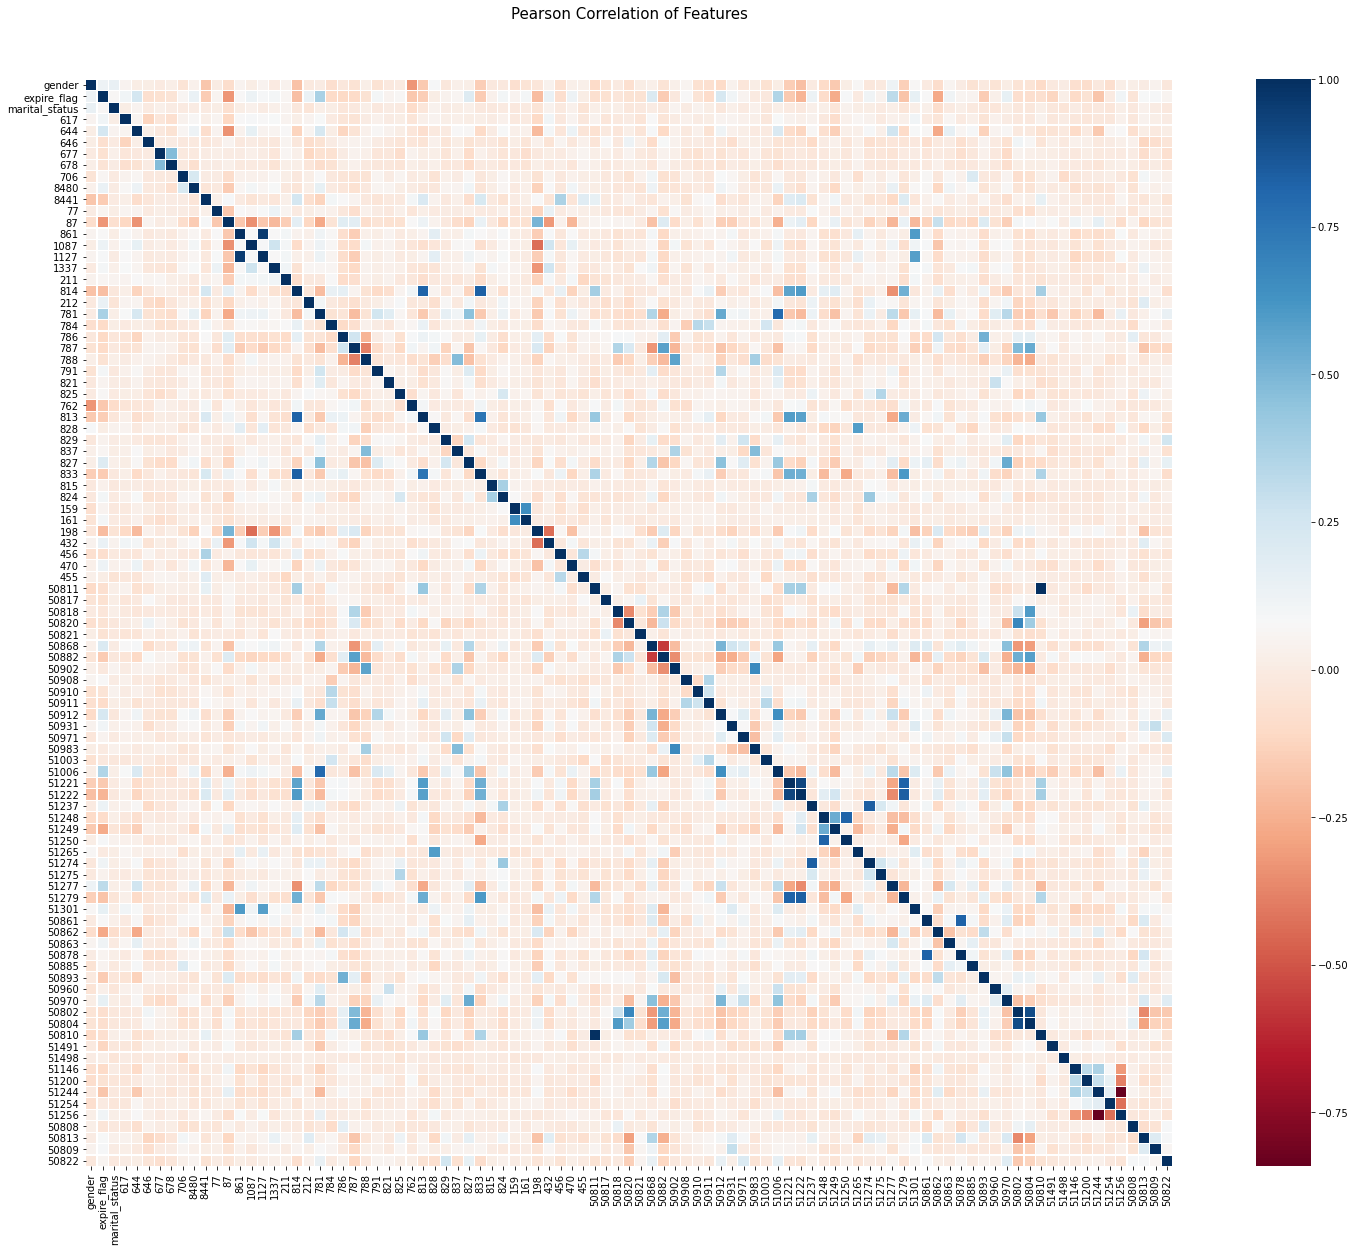

In [112]:
colormap = plt.cm.RdBu # 绘图库中的颜色查找表。比如A1是红色,A2是浅蓝色。 这样一种映射关系
plt.figure(figsize=(30,20))#创建一个新的图表，参数是尺寸，单位为英寸。
plt.title('Pearson Correlation of Features', y=1.05, size=15) #给图表一个标题~~ 
sns.heatmap(data_2000_60_digit.corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=False) #将皮尔森系数值画成图表形式。

In [120]:
data_2000_60_digit.corr()['expire_flag'].to_csv('C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/expire_flag_digit_score.csv')

In [121]:
data_2000_60_digit.corr().to_csv('C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total_2000_60_digit_score.csv')

In [154]:
corr = data_2000_60_digit.corr()
expire_flag = corr['expire_flag'].sort_values(ascending=False)
expire_flag[((expire_flag > 0.1) | (expire_flag < -0.1)) & (expire_flag < 1)]

781       0.375710
51006     0.359603
51277     0.321986
644       0.238878
50912     0.233801
50868     0.213981
827       0.198563
50970     0.153713
51301     0.153474
8480      0.142891
432       0.142306
212       0.140674
51237     0.130644
1087      0.130606
gender    0.129447
470       0.124357
51274     0.121738
50863     0.116171
50931     0.114107
51256     0.111088
617       0.111015
824       0.103291
787      -0.100330
786      -0.101994
51491    -0.118477
813      -0.143928
833      -0.151473
50882    -0.153958
8441     -0.155427
50893    -0.157147
51221    -0.163988
762      -0.171873
51244    -0.179434
51279    -0.182155
814      -0.200934
198      -0.201258
51222    -0.233413
51249    -0.262149
50862    -0.269534
87       -0.326268
Name: expire_flag, dtype: float64

In [164]:
corr_data = data_2000_60_digit[expire_flag[(expire_flag > 0.1) | (expire_flag < -0.1)].index]
corr_data.to_csv('C:/Users/wangkc/Desktop/python/CLOUT/CLOUT/total_2000_60_corr_data.csv')

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [170]:
X, y = np.array(corr_data.drop('expire_flag', axis=1)), np.array(corr_data['expire_flag'])

In [171]:
X

array([[20.  , 21.  , 14.5 , ..., 34.  ,  3.19, 16.  ],
       [11.  , 12.  , 12.2 , ..., 33.7 ,  3.19, 18.  ],
       [17.  , 14.  , 16.9 , ..., 32.9 ,  3.19, 15.  ],
       ...,
       [17.  , 18.  , 14.1 , ..., 34.6 ,  3.2 , 18.  ],
       [21.  , 16.  , 13.2 , ..., 33.9 ,  3.19, 14.  ],
       [31.  , 40.  , 15.  , ..., 33.  ,  3.7 , 16.  ]])

In [172]:
y

array([1., 0., 0., ..., 1., 0., 1.])

In [173]:
X.shape

(2951, 40)

In [174]:
y.shape

(2951,)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666,test_size = 0.33 )

In [176]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [177]:
standard_scaler.mean_

array([2.82510875e+01, 2.87656500e+01, 1.45701568e+01, 2.40768842e-01,
       1.44281234e+00, 1.41814466e+01, 3.63342438e+00, 3.55037936e+00,
       1.11722610e+01, 1.76024279e-01, 1.34344967e+00, 9.81284775e-01,
       1.35762772e+00, 4.18310572e-01, 3.82397572e-01, 5.02141123e+00,
       1.43153566e+01, 9.46848761e+01, 1.32455579e+02, 7.77868589e+01,
       7.53667172e-02, 1.46640668e+01, 2.41365099e+01, 8.33574104e+00,
       5.78154780e+00, 3.24498996e+01, 3.64436521e+00, 2.50910875e+01,
       5.65552858e+01, 8.48055134e+00, 3.29015175e+01, 8.02136014e+01,
       1.42629843e+01, 3.69460293e+00, 1.10377390e+01, 1.29656651e+01,
       1.11698533e+01, 3.39729894e+01, 3.18938796e+00, 1.50665655e+01])

In [178]:
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [179]:
lr = LogisticRegression(C=1000,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.7761806981519507

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [181]:
def PolynomialLogisticRegression(degree=2, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [186]:
from sklearn.model_selection import GridSearchCV

log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'poly__degree': [i for i in range(3, 5)],   
            'log_reg__C': log_reg_c
        }

grid_search = GridSearchCV(PolynomialLogisticRegression(), param_grid)
grid_search.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                            

In [187]:
grid_search.best_score_

0.7491088096151387

In [188]:
grid_search.best_params_

{'log_reg__C': 0.001, 'poly__degree': 3}

In [189]:
def LogisticRegressionV2(C=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [190]:
log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'log_reg__C': log_reg_c
        }
grid_search = GridSearchCV(LogisticRegressionV2(), param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
         

In [191]:
grid_search.best_score_

0.7501253036696075

In [192]:
grid_search.best_params_

{'log_reg__C': 10}

In [213]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [219]:
grid_search.best_estimator_.score(X_test_standard,y_test)

0.7761806981519507

In [193]:
lr = LogisticRegression(C=1000,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.7761806981519507

In [194]:
lr = LogisticRegression(C=10,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.7761806981519507

In [195]:
lr = LogisticRegression(C=1,random_state=666)
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.7761806981519507

In [196]:
X_test_standard.shape

(974, 40)

In [198]:
X_train_standard.shape

(1977, 40)

In [199]:
y_test.shape

(974,)

In [200]:
y_train.shape

(1977,)

In [201]:
X_train_standard.shape

(1977, 40)

In [202]:
X_test_standard.shape

(974, 40)

In [203]:
X_train_standard

array([[-6.14220336e-01, -4.96945002e-01, -8.18779802e-01, ...,
         5.35846060e-01,  1.17558565e-03, -7.65124725e-01],
       [ 3.12828611e-01,  1.95458619e-01, -1.32002009e+00, ...,
         7.30225447e-01,  1.17558565e-03,  3.45594568e-01],
       [ 1.28623001e+00,  1.21098393e+00,  1.96588847e+00, ...,
        -4.72921018e-02, -1.51623345e+00, -1.13536449e+00],
       ...,
       [-1.07774481e+00, -1.00470766e+00, -9.30166533e-01, ...,
        -3.71257747e-01,  1.17558565e-03, -3.94884961e-01],
       [-5.79909678e-02,  1.08176537e-02, -7.63086437e-01, ...,
         7.95018576e-01,  1.17558565e-03,  3.45594568e-01],
       [-6.14220336e-01, -7.27746209e-01, -7.63086437e-01, ...,
         5.35846060e-01,  1.17558565e-03, -3.94884961e-01]])

In [204]:
X_train

array([[15.  , 18.  , 13.1 , ..., 34.8 ,  3.19, 13.  ],
       [35.  , 33.  , 12.2 , ..., 35.1 ,  3.19, 16.  ],
       [56.  , 55.  , 18.1 , ..., 33.9 ,  2.4 , 12.  ],
       ...,
       [ 5.  ,  7.  , 12.9 , ..., 33.4 ,  3.19, 14.  ],
       [27.  , 29.  , 13.2 , ..., 35.2 ,  3.19, 16.  ],
       [15.  , 13.  , 13.2 , ..., 34.8 ,  3.19, 14.  ]])

In [211]:
lr = LogisticRegression()
lr.fit(X_train_standard,y_train)
lr.score(X_test_standard,y_test) # 输出一个正确率

0.7761806981519507

In [212]:
lr.score(X_train_standard, y_train)

0.7592311583206879

In [215]:
log_reg_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {
            'C': log_reg_c
        }
grid_search = GridSearchCV(LogisticRegression(), param_grid)
grid_search.fit(X_train_standard, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [216]:
grid_search.best_score_

0.7501253036696075

In [217]:
grid_search.best_params_

{'C': 10}

In [218]:
grid_search.best_estimator_.score(X_test_standard,y_test)

0.7761806981519507

In [243]:
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
 
grid_search_2 = GridSearchCV(LogisticRegression(), tuned_parameters,cv=5)
grid_search_2.fit(X_train_standard, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [244]:
grid_search_2.best_score_

0.7501253036696075

In [245]:
grid_search_2.best_params_

{'C': 10, 'penalty': 'l2'}

In [247]:
grid_search_2.best_estimator_.score(X_test_standard, y_test)

0.7761806981519507

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [248]:
#param_grid={'gamma':np.linspace(0, 0.001, 100)}
param_grid = {
    'kernel': ('linear', 'rbf'),
    'C': np.arange(0.5, 1.5, 0.01)
}
grid_search_3 = GridSearchCV(SVC(), param_grid)
grid_search_3.fit(X_train_standard, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.5...
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49]),
                         'kernel': ('linear', 'rbf')},
           

In [249]:
grid_search_3.best_score_

0.7622618590973022

In [250]:
grid_search_3.best_params_

{'C': 1.0400000000000005, 'kernel': 'rbf'}

In [251]:
grid_search_3.best_estimator_.score(X_test_standard, y_test)

0.7792607802874744

In [252]:
%%time
param_grid ={
            'criterion':['gini','entropy'],
            'max_depth':np.arange(1, 10, 1)
            }
grid_search_4 = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search_4.fit(X_train_standard, y_train)

Wall time: 1.15 s


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [253]:
grid_search_4.best_score_

0.7177445339470656

In [254]:
grid_search_4.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [255]:
grid_search_4.best_estimator_.score(X_test_standard, y_test)

0.731006160164271

In [256]:
vt_clf = VotingClassifier([
    ('log_clf', grid_search_2.best_estimator_),
    ('svc_clf', SVC(C=1.0400000000000005, kernel='rbf',probability=True)),
    ('dt_clf', grid_search_4.best_estimator_)],
    voting='soft'
)

In [257]:
vt_clf.fit(X_train_standard, y_train)
vt_clf.score(X_test_standard, y_test)

0.7782340862422998

In [258]:
grid_search_3.best_estimator_.predict(X_test_standard)

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0.

In [259]:
y_test

array([0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1.

In [262]:
sum(grid_search_3.best_estimator_.predict(X_test_standard)==y_test) / len(y_test)

0.7792607802874744